In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import StandardScaler 
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn import semi_supervised, svm

df = pd.read_csv('./Data/cleandata1.csv')
df=df.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]
# tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


In [8]:
y_train

[0.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,

#SelfTrainingClassifier

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Create example dataset with labeled and unlabeled data
data = {'feature_1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature_2': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
        'target': [1, 0, 1, 0, 1, 0, -1, -1, -1, -1]}
df = pd.DataFrame(data)

# Separate labeled and unlabeled data
labeled_data = df[df['target'] != -1]
unlabeled_data = df[df['target'] == -1].drop('target', axis=1)

# Split labeled data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    labeled_data.drop('target', axis=1), labeled_data['target'], test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)
# Create self-training classifier with Random Forest as the base estimator
rf = RandomForestClassifier()
self_training_model = rf

# Fit self-training classifier on labeled data
self_training_model.fit(x_train, y_train)

# Make predictions on validation set
y_pred = self_training_model.predict(x_val)

# Print classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_val, y_pred, target_names=target_names))

# Use self-training classifier to make predictions on unlabeled data
unlabeled_predictions = self_training_model.predict(unlabeled_data)

# Add predicted labels to unlabeled data and combine with labeled data
unlabeled_data['target'] = unlabeled_predictions
labeled_data = pd.concat([labeled_data, unlabeled_data], axis=0)

# Split combined data back into labeled and unlabeled data
labeled_data = labeled_data[labeled_data['target'] != -1]
unlabeled_data = labeled_data[labeled_data['target'] == -1].drop('target', axis=1)

# Fit self-training classifier on updated labeled data
self_training_model.fit(labeled_data.drop('target', axis=1), labeled_data['target'])

# Make final predictions on validation set
y_pred_final = self_training_model.predict(x_val)

# Print final classification report
print(classification_report(y_val, y_pred_final, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         1
     Class 1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter

Accuracy: 22.82%

 Training Accuracy score: 0.29128497152760585
Testing Accuracy score: 0.22821782178217823
classification_report 
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1424
         0.0       0.15      0.95      0.26       239
         1.0       0.45      0.66      0.53       357

    accuracy                           0.23      2020
   macro avg       0.20      0.53      0.26      2020
weighted avg       0.10      0.23      0.13      2020



d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


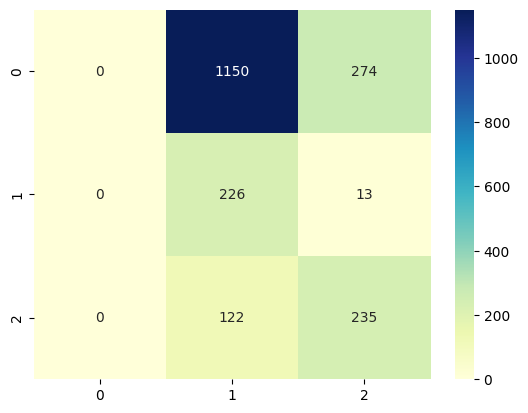

In [10]:
score = self_training_model.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = self_training_model.predict(x_train)
y_pred_test = self_training_model.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

 semi-supervised learning technique designed to handle imbalanced datasets is Co-training